In [1]:
# 1 Importing important modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# 2 Reading the csv file
playstore_data = pd.read_csv("Playstore_data.csv")

In [3]:
#Dataframe
playstore_data = pd.DataFrame(playstore_data)

In [4]:
#Reading the first five rows from the file
playstore_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
#Reading the last five rows of the file
playstore_data.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [6]:
#Checking the shape of the data
playstore_data.shape

(10841, 13)

In [7]:
#Seeing the datatypes and null valuesbb
playstore_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [8]:
# 3 The five point summary of data
playstore_data.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [9]:
#Only columns can have a look
playstore_data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [10]:
#4 checking for the duplicates and printing
playstore_data[playstore_data.duplicated()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,"1,000,000+",Free,0,Everyone,Business,"July 16, 2018",4.3.0.508,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8643,Wunderlist: To-Do List & Tasks,PRODUCTIVITY,4.6,404610,Varies with device,"10,000,000+",Free,0,Everyone,Productivity,"April 6, 2018",Varies with device,Varies with device
8654,"TickTick: To Do List with Reminder, Day Planner",PRODUCTIVITY,4.6,25370,Varies with device,"1,000,000+",Free,0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device
8658,ColorNote Notepad Notes,PRODUCTIVITY,4.6,2401017,Varies with device,"100,000,000+",Free,0,Everyone,Productivity,"June 27, 2018",Varies with device,Varies with device
10049,Airway Ex - Intubate. Anesthetize. Train.,MEDICAL,4.3,123,86M,"10,000+",Free,0,Everyone,Medical,"June 1, 2018",0.6.88,5.0 and up


In [11]:
#droping the duplicates 
playstore_data.drop_duplicates(inplace = True)


In [12]:
#checking the shape of the data
playstore_data.shape

(10358, 13)

In [13]:
#5 Checking the category whether it have invalid categories
playstore_data['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [14]:
#Dropping the invalid category 1.9
playstore_data = playstore_data[playstore_data['Category'] != '1.9']
playstore_data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [15]:
#checking the null values
playstore_data.isna().sum()

App                  0
Category             0
Rating            1465
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [16]:
#Dropping the null values 
playstore_data.dropna(inplace = True)
playstore_data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [17]:
#6 Here we changing the rating column with two values high and low if rating is >3.5 is high else low 
playstore_data['Rating_Category'] =  playstore_data.Rating.apply(lambda x: 'High' if x>3.5 else 'Low')

In [18]:
playstore_data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Rating_Category'],
      dtype='object')

In [19]:
#Checking the Rating column how many unique values
playstore_data.Rating.nunique()

39

<Axes: >

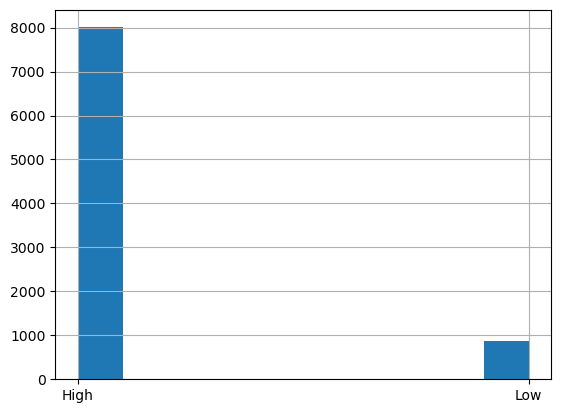

In [20]:
#7 The Ratings with greater than 3.5 are more
playstore_data['Rating_Category'].hist()

In [21]:
#Changing the data type of Review as int
playstore_data.Reviews = playstore_data.Reviews.astype(int)

In [22]:
#8 Checking the outliers in the reviews column
Q1 = playstore_data.Reviews.quantile(0.25)
Q3 = playstore_data.Reviews.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
Upper_bound = Q3 + 1.5 * IQR
outliers = playstore_data[(playstore_data.Reviews < lower_bound) | (playstore_data.Reviews > Upper_bound)]

In [23]:
#Dealing the outliers with log transformation
playstore_data.Reviews = np.log1p(playstore_data.Reviews)
playstore_data.Reviews

0         5.075174
1         6.875232
2        11.379520
3        12.281389
4         6.875232
           ...    
10834     2.079442
10836     3.663562
10837     1.609438
10839     4.744932
10840    12.894981
Name: Reviews, Length: 8886, dtype: float64

In [24]:
#9 converting the size with appropirate type
def size_conversion(Size):
    if isinstance(Size , str):
        if 'M' in Size:
            return float(Size.replace('M',''))*1024*1024
        else:
            if 'k' in Size:
                return float(Size.replace('k',''))*1024

In [25]:
playstore_data.Size = playstore_data.Size.apply(size_conversion)

In [26]:
#Removing the string related values in the Size column
playstore_data = playstore_data[~(playstore_data.Size == "Varies with device")]

In [27]:
#Checking for null values
playstore_data.isnull().sum()

App                   0
Category              0
Rating                0
Reviews               0
Size               1468
Installs              0
Type                  0
Price                 0
Content Rating        0
Genres                0
Last Updated          0
Current Ver           0
Android Ver           0
Rating_Category       0
dtype: int64

In [28]:
#unique values in installs 
playstore_data.Installs.unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '100+', '500+', '10+',
       '5+', '50+', '1+'], dtype=object)

In [29]:
#10 Here we can see the install values end with '+' and middle ',' dropping the '+'',' for better understanding 
playstore_data['Installs'] = playstore_data['Installs'].str.replace('+','').str.replace(',','')

In [30]:
#converting the install data type 
playstore_data.Installs = playstore_data.Installs.astype(int)

In [31]:
#11 Price column unique values here removing the dollar symbol
playstore_data.Price.unique()

array(['0', '$4.99', '$3.99', '$6.99', '$7.99', '$5.99', '$2.99', '$3.49',
       '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49', '$10.00',
       '$24.99', '$11.99', '$79.99', '$16.99', '$14.99', '$29.99',
       '$12.99', '$2.49', '$10.99', '$1.50', '$19.99', '$15.99', '$33.99',
       '$39.99', '$3.95', '$4.49', '$1.70', '$8.99', '$1.49', '$3.88',
       '$399.99', '$17.99', '$400.00', '$3.02', '$1.76', '$4.84', '$4.77',
       '$1.61', '$2.50', '$1.59', '$6.49', '$1.29', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$8.49', '$1.75', '$14.00', '$2.00',
       '$3.08', '$2.59', '$19.40', '$3.90', '$4.59', '$15.46', '$3.04',
       '$13.99', '$4.29', '$3.28', '$4.60', '$1.00', '$2.95', '$2.90',
       '$1.97', '$2.56', '$1.20'], dtype=object)

In [32]:
# Price column here removing the dollar symbol
playstore_data.Price  = playstore_data.Price.str.replace('$','').astype(float)

In [33]:
#12 Dropping the unusable columns
playstore_data1 = playstore_data.drop(columns= [ 'App','Genres','Last Updated','Current Ver','Android Ver','Rating_Category'])

In [34]:
#Finding the outliers in the new data after droping some columns
q1 = playstore_data1.quantile(0.25)
q3 = playstore_data1.quantile(0.75)
iqr = q3 - q1
ub = q3 + 1.5 * iqr
lb = q1 - 1.5 * iqr
o_utliers = ((playstore_data1 < lb ) | (playstore_data1 > ub)).any(axis =1)

In [35]:
playstore_data1[o_utliers]

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
3,ART_AND_DESIGN,4.5,12.281389,26214400.0,50000000,Free,0.00,Teen
87,AUTO_AND_VEHICLES,3.2,5.525453,1153433.6,100000,Free,0.00,Everyone
139,BOOKS_AND_REFERENCE,4.6,14.885286,NaN,100000000,Free,0.00,Teen
143,BOOKS_AND_REFERENCE,4.2,13.609815,NaN,100000000,Free,0.00,Teen
152,BOOKS_AND_REFERENCE,3.9,14.175444,NaN,1000000000,Free,0.00,Teen
...,...,...,...,...,...,...,...,...
10782,GAME,3.8,5.533389,11534336.0,10000,Paid,16.99,Teen
10784,GAME,4.3,12.410873,88080384.0,10000000,Free,0.00,Everyone 10+
10785,FAMILY,4.2,7.248504,9961472.0,10000,Paid,1.20,Everyone
10793,GAME,4.4,10.258045,81788928.0,500000,Free,0.00,Teen


In [36]:
#13 Encoding the categorical columns
Catgeory_dummies  = pd.get_dummies(playstore_data1.Category,prefix = 'Catgories')
Type_dumies = pd.get_dummies(playstore_data1.Type,prefix='Types')
content_dummies = pd.get_dummies(playstore_data1['Content Rating'],prefix='content_ratings')

In [37]:
#14 segarting the target and independent variables
playstore_data1 = pd.concat([playstore_data1,Catgeory_dummies,Type_dumies,content_dummies], axis=1)

In [38]:
playstore_data1 = playstore_data1.drop(['Category','Type','Content Rating'],axis =1)

In [39]:
playstore_data1.Size =playstore_data1.Size.replace(np.nan,0)

In [40]:
playstore_data1.corr()

,Rating,Reviews,Size,Installs,Price,Catgories_ART_AND_DESIGN,Catgories_AUTO_AND_VEHICLES,Catgories_BEAUTY,Catgories_BOOKS_AND_REFERENCE,Catgories_BUSINESS,...,Catgories_VIDEO_PLAYERS,Catgories_WEATHER,Types_Free,Types_Paid,content_ratings_Adults only 18+,content_ratings_Everyone,content_ratings_Everyone 10+,content_ratings_Mature 17+,content_ratings_Teen,content_ratings_Unrated
Rating,1.000000,0.207765,0.047059,0.050869,-0.022371,0.030094,0.000427,0.011953,0.043527,-0.028928,...,-0.032196,0.009897,-0.038358,0.038358,0.003941,-0.026783,0.026043,-0.026822,0.035116,-0.001786
Reviews,0.207765,1.000000,0.174826,0.334133,-0.042915,-0.027483,-0.038939,-0.032708,-0.027579,-0.101392,...,0.027401,0.032830,0.181661,-0.181661,0.008016,-0.183522,0.111050,0.037885,0.137130,-0.003264
Size,0.047059,0.174826,1.000000,-0.006744,-0.017136,-0.024185,-0.001621,-0.015965,-0.046476,-0.056324,...,-0.042826,-0.039613,0.007655,-0.007655,-0.002954,-0.183305,0.135575,0.026379,0.129992,-0.005806
Installs,0.050869,0.334133,-0.006744,1.000000,-0.011334,-0.013918,-0.016615,-0.012650,-0.009362,-0.027255,...,0.035085,-0.011553,0.051539,-0.051539,-0.003368,-0.054318,0.034690,-0.015449,0.057379,-0.002020
Price,-0.022371,-0.042915,-0.017136,-0.011334,1.000000,-0.004444,-0.005262,-0.004100,-0.007295,-0.007925,...,-0.007510,-0.003254,-0.218966,0.218966,-0.001093,0.014841,-0.007056,-0.009756,-0.007817,-0.000631
Catgories_ART_AND_DESIGN,0.030094,-0.027483,-0.024185,-0.013918,-0.004444,1.000000,-0.007567,-0.005729,-0.011853,-0.014718,...,-0.011258,-0.007671,0.006433,-0.006433,-0.001528,0.028286,-0.010171,-0.018309,-0.017156,-0.000882
Catgories_AUTO_AND_VEHICLES,0.000427,-0.038939,-0.001621,-0.016615,-0.005262,-0.007567,1.000000,-0.006272,-0.012975,-0.016111,...,-0.012324,-0.008397,0.019804,-0.019804,-0.001673,0.039615,-0.012378,-0.020042,-0.028902,-0.000966
Catgories_BEAUTY,0.011953,-0.032708,-0.015965,-0.012650,-0.004100,-0.005729,-0.006272,1.000000,-0.009824,-0.012199,...,-0.009332,-0.006358,0.018726,-0.018726,-0.001266,0.022441,-0.014161,-0.007364,-0.014557,-0.000731
Catgories_BOOKS_AND_REFERENCE,0.043527,-0.027579,-0.046476,-0.009362,-0.007295,-0.011853,-0.012975,-0.009824,1.000000,-0.025237,...,-0.019304,-0.013153,0.013275,-0.013275,-0.002620,0.015630,-0.008868,-0.019890,-0.000902,-0.001512
Catgories_BUSINESS,-0.028928,-0.101392,-0.056324,-0.027255,-0.007925,-0.014718,-0.016111,-0.012199,-0.025237,1.000000,...,-0.023971,-0.016332,0.024783,-0.024783,-0.003253,0.082598,-0.036375,-0.038983,-0.055596,-0.001878


In [41]:
x = playstore_data1.drop(columns=['Rating'])
y = playstore_data1[['Rating']]

In [42]:
playstore_data1.isnull().sum()

Rating                             0
Reviews                            0
Size                               0
Installs                           0
Price                              0
Catgories_ART_AND_DESIGN           0
Catgories_AUTO_AND_VEHICLES        0
Catgories_BEAUTY                   0
Catgories_BOOKS_AND_REFERENCE      0
Catgories_BUSINESS                 0
Catgories_COMICS                   0
Catgories_COMMUNICATION            0
Catgories_DATING                   0
Catgories_EDUCATION                0
Catgories_ENTERTAINMENT            0
Catgories_EVENTS                   0
Catgories_FAMILY                   0
Catgories_FINANCE                  0
Catgories_FOOD_AND_DRINK           0
Catgories_GAME                     0
Catgories_HEALTH_AND_FITNESS       0
Catgories_HOUSE_AND_HOME           0
Catgories_LIBRARIES_AND_DEMO       0
Catgories_LIFESTYLE                0
Catgories_MAPS_AND_NAVIGATION      0
Catgories_MEDICAL                  0
Catgories_NEWS_AND_MAGAZINES       0
C

In [43]:
# 15Splitting the dataset into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30 , random_state=1)

In [44]:
model = LinearRegression()

model.fit(x_train, y_train)

LinearRegression()

In [45]:
intercept = model.intercept_
intercept

array([4.06801689])

In [46]:
model.score(x_test,y_test)

0.0702472764538683

In [47]:
model.score(x_train,y_train)

0.07554408608928098

In [48]:
#16 Standardize the values 
for i in x:
    mx = MinMaxScaler()
    x[i] = mx.fit_transform(x[[i]])

In [49]:
x.head()

,Reviews,Size,Installs,Price,Catgories_ART_AND_DESIGN,Catgories_AUTO_AND_VEHICLES,Catgories_BEAUTY,Catgories_BOOKS_AND_REFERENCE,Catgories_BUSINESS,Catgories_COMICS,...,Catgories_VIDEO_PLAYERS,Catgories_WEATHER,Types_Free,Types_Paid,content_ratings_Adults only 18+,content_ratings_Everyone,content_ratings_Everyone 10+,content_ratings_Mature 17+,content_ratings_Teen,content_ratings_Unrated
0,0.250672,0.190,0.00001,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.353644,0.140,0.00050,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.611310,0.087,0.00500,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.662901,0.250,0.05000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.353644,0.028,0.00010,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [50]:
for i in y:
    my = MinMaxScaler()
    y[i] = my.fit_transform(y[[i]])

In [51]:
y.head()

,Rating
0,0.775
1,0.725
2,0.925
3,0.875
4,0.825
